Import libraries to begin the data analysis process

In [45]:
# Pour les imports de la bibliothèque standard, aucune installation n'est nécessaire.

# Installation de pandas, numpy et sqlite3 (sqlite3 est inclus avec Python, donc pas besoin de l'installer séparément)
%pip install pandas numpy

# Installation de NLTK
%pip install nltk

# Installation des bibliothèques de visualisation matplotlib, seaborn, plotly, et wordcloud
%pip install matplotlib seaborn plotly wordcloud

# Installation des outils de prétraitement et de sélection de modèles de scikit-learn
%pip install scikit-learn

# Installation de XGBoost
%pip install xgboost



^C
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.



In [ ]:
# Standard library imports
from collections import Counter

# Data manipulation and analysis
import pandas as pd
import numpy as np
import sqlite3

# Natural Language Processing
import nltk

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from wordcloud import WordCloud, STOPWORDS

# Machine Learning - preprocessing and model selection
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, StratifiedKFold

# Machine Learning - models
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
sns.set(style="whitegrid")

# Initialize Plotly for interactive visualizations in a notebook environment
init_notebook_mode(connected=True)


**Importing data**

In [ ]:
zip_file_path = 'https://files.consumerfinance.gov/ccdb/complaints.csv.zip'

In [ ]:
df = pd.read_csv(zip_file_path)

C:\Users\Acer\AppData\Local\Temp\ipykernel_9960\2561993390.py:1: DtypeWarning:

Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.



In [ ]:
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2024-02-28,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Credit inquiries on your report that you don't...,NaN,NaN,"EQUIFAX, INC.",MA,02121,NaN,NaN,Web,2024-02-28,In progress,Yes,NaN,8435705
1,2024-02-28,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,NaN,NaN,"EQUIFAX, INC.",NY,10314,NaN,NaN,Web,2024-02-28,In progress,Yes,NaN,8435709
2,2024-02-28,Credit reporting or other personal consumer re...,Credit reporting,Problem with a company's investigation into an...,Their investigation did not fix an error on yo...,NaN,NaN,"EQUIFAX, INC.",NV,89086,NaN,NaN,Web,2024-02-28,In progress,Yes,NaN,8435711
3,2024-02-28,Credit reporting or other personal consumer re...,Credit reporting,Problem with a company's investigation into an...,Their investigation did not fix an error on yo...,NaN,NaN,"EQUIFAX, INC.",NC,28215,NaN,NaN,Web,2024-02-28,In progress,Yes,NaN,8435756
4,2024-02-28,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Credit inquiries on your report that you don't...,NaN,NaN,"EQUIFAX, INC.",CA,90746,NaN,NaN,Web,2024-02-28,In progress,Yes,NaN,8435795


**Data Analysis**

In [ ]:
df.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4771566 entries, 0 to 4771565
Data columns (total 18 columns):
 #   Column                        Dtype 
---  ------                        ----- 
 0   Date received                 object
 1   Product                       object
 2   Sub-product                   object
 3   Issue                         object
 4   Sub-issue                     object
 5   Consumer complaint narrative  object
 6   Company public response       object
 7   Company                       object
 8   State                         object
 9   ZIP code                      object
 10  Tags                          object
 11  Consumer consent provided?    object
 12  Submitted via                 object
 13  Date sent to company          object
 14  Company response to consumer  object
 15  Timely response?              object
 16  Consumer disputed?            object
 17  Complaint ID                  int64 
dtypes: int64(1), object(17)
memory usage: 655.

In [ ]:
df.shape

(4771566, 18)

In [ ]:
df['Consumer consent provided?'].value_counts()

Consumer consent provided?
Consent not provided    1866278
Consent provided        1706805
Other                    222807
Consent withdrawn          8445
Name: count, dtype: int64

In [ ]:
df[df['Consumer disputed?'] == 'Yes'].shape[0]

148378

In [ ]:
nan_values = df[df['Consumer consent provided?'].isna()]
nan_values.shape

(967231, 18)

In [ ]:
# Count the occurrences of each category
issue_counts = df['Issue'].value_counts()
issue_counts

Issue
Incorrect information on your report                                                1348563
Improper use of your report                                                          697844
Problem with a credit reporting company's investigation into an existing problem     589338
Attempts to collect debt not owed                                                    198939
Problem with a company's investigation into an existing problem                      134247
                                                                                     ...   
Problem with an overdraft                                                                 9
Lender damaged or destroyed vehicle                                                       8
Property was damaged or destroyed property                                                7
Lender sold the property                                                                  7
Lender damaged or destroyed property                                      

In [ ]:
product_counts = df['Product'].value_counts()

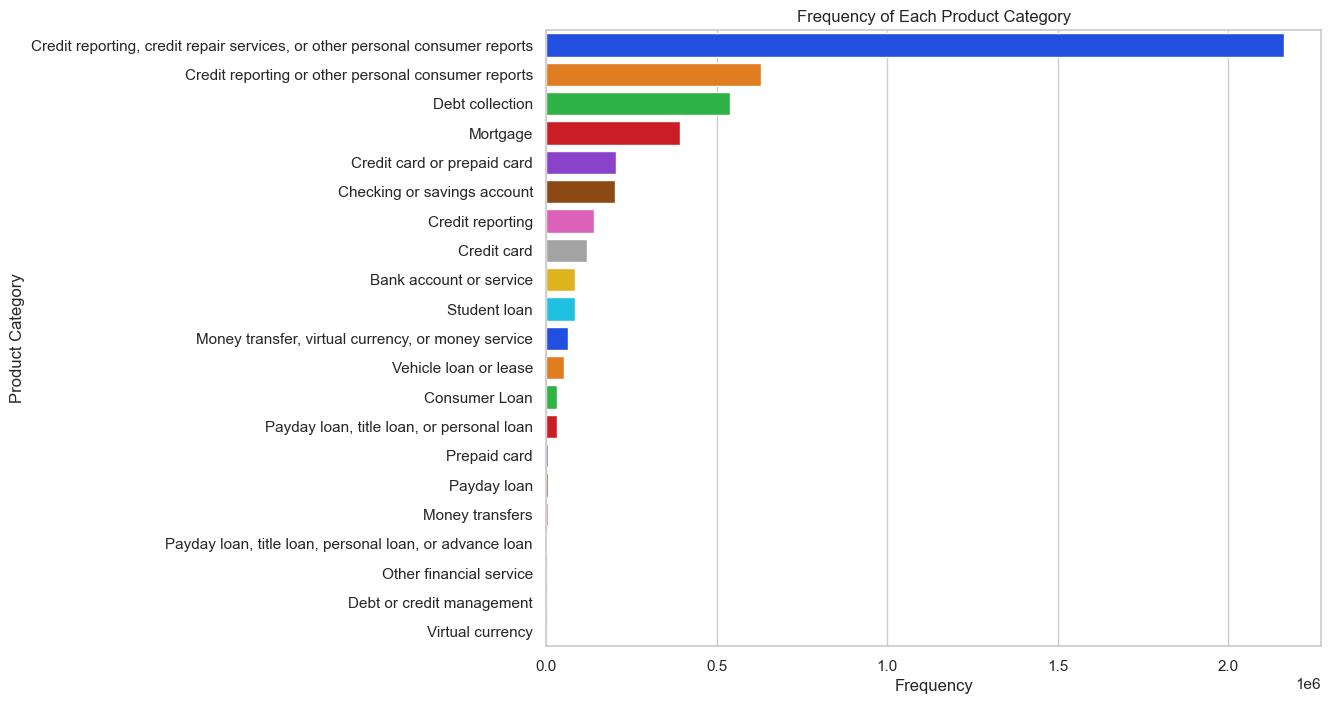

In [ ]:
plt.figure(figsize=(10, 8))
sns.barplot(x=product_counts.values, y=product_counts.index, orient='h', palette='bright')  # Using the 'bright' palette for a colorful plot
plt.title('Frequency of Each Product Category')
plt.xlabel('Frequency')
plt.ylabel('Product Category')
plt.show()

In [ ]:
company_response = df['Company response to consumer'].value_counts()

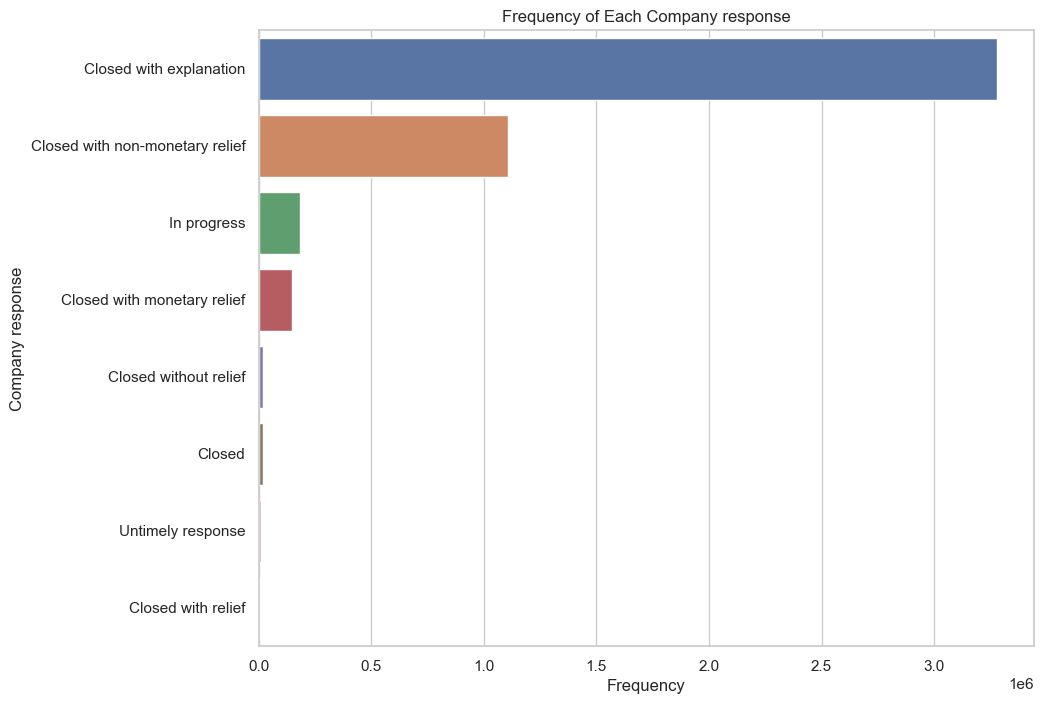

In [ ]:
plt.figure(figsize=(10, 8))
sns.barplot(x=company_response.values, y=company_response.index, orient='h')
plt.title('Frequency of Each Company response')
plt.xlabel('Frequency')
plt.ylabel('Company response')
plt.show()

In [ ]:
consumer_disputed = df['Consumer disputed?'].value_counts()

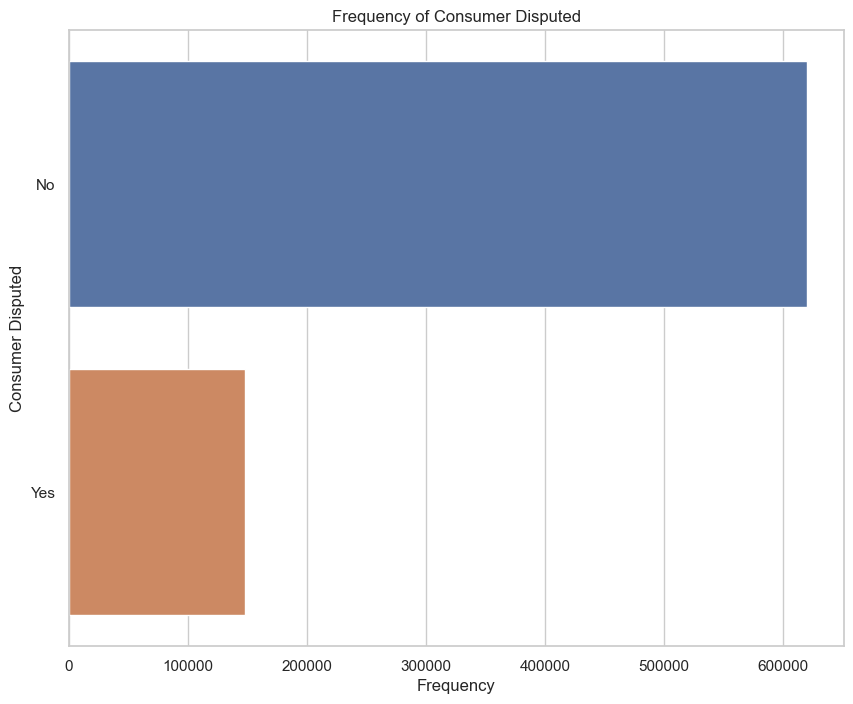

In [ ]:
plt.figure(figsize=(10, 8))
sns.barplot(x=consumer_disputed.values, y=consumer_disputed.index, orient='h')
plt.title('Frequency of Consumer Disputed')
plt.xlabel('Frequency')
plt.ylabel('Consumer Disputed')
plt.show()

In [ ]:
# Convert 'Consumer disputed?' and 'Timely response?' to numerical format
df['Consumer disputed?'] = df['Consumer disputed?'].map({'Yes': 1, 'No': 0}).fillna(-1)  # -1 for missing values
df['Timely response?'] = df['Timely response?'].map({'Yes': 1, 'No': 0})

In [ ]:
# Convert 'Date received' and 'Date sent to company' to datetime objects and calculate 'Response time (days)'
df['Date received'] = pd.to_datetime(df['Date received'])
df['Date sent to company'] = pd.to_datetime(df['Date sent to company'])
df['Response time (days)'] = (df['Date sent to company'] - df['Date received']).dt.days

In [ ]:
# Analyzing 'Submitted via' method
submitted_via_counts = df['Submitted via'].value_counts(ascending=True)
print(submitted_via_counts)

Submitted via
Email               425
Web Referral       1241
Fax               25658
Postal mail       92850
Phone            175994
Referral         246147
Web             4229251
Name: count, dtype: int64


In [ ]:
# Handling missing data and preparing for machine learning models
missing_data = df.isnull().sum()
print(missing_data)

Date received                         0
Product                               0
Sub-product                      235290
Issue                                 0
Sub-issue                        728813
Consumer complaint narrative    3066227
Company public response         2513771
Company                               0
State                             44487
ZIP code                          30224
Tags                            4307125
Consumer consent provided?       967231
Submitted via                         0
Date sent to company                  0
Company response to consumer          8
Timely response?                      0
Consumer disputed?                    0
Complaint ID                          0
Response time (days)                  0
dtype: int64


In [ ]:
num_features = ['Response time (days)']  # Example numerical feature
cat_features = ['Product', 'Sub-product', 'Issue', 'Sub-issue', 'Company', 'State']  # Example categorical features
text_features = 'Consumer complaint narrative'  # Text feature

In [ ]:
# Numerical data transformer (placeholder for potential numerical processing)
numerical_transformer = SimpleImputer(strategy='mean')

In [ ]:
df['Consumer complaint narrative'] = df['Consumer complaint narrative'].fillna('')

In [ ]:
# Categorical data transformer
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Adjusting the text_transformer pipeline to first replace NaN values
text_transformer = Pipeline(steps=[
    # Directly apply TF-IDF on the filled text data
    ('tfidf', TfidfVectorizer(stop_words='english', max_features=1000))
])

In [ ]:
# Adjusting the preprocessor with correct column specification for text
preprocessor = ColumnTransformer(
    transformers=[
        # Include transformers for numerical and categorical data as before
        ('text', text_transformer, ['Consumer complaint narrative'])  # Adjusted text transformer
    ])

In [ ]:
# Example of applying preprocessing (ensure 'df' is your DataFrame)
df_preprocessed = preprocessor.fit_transform(df)

Text(0.5, 1.0, 'Correlation Matrix')

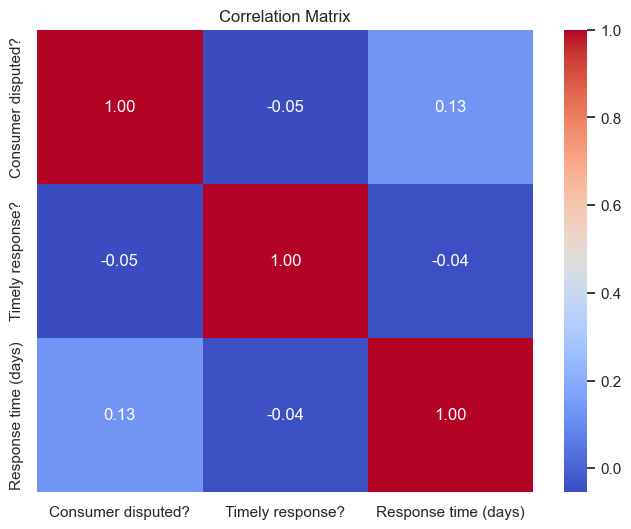

In [ ]:
# Visualize the correlation matrix
correlation_matrix = df[['Consumer disputed?', 'Timely response?', 'Response time (days)']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title('Correlation Matrix')


In [ ]:
categorical_cols = ['Product', 'Sub-product', 'Issue', 'Sub-issue', 'Company', 'State']  # Example

In [ ]:
%pip install --upgrade scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from sklearn.linear_model import LogisticRegression

# Assuming 'y' is your target variable
model = LogisticRegression()
model.fit(encoded_sparse_matrix, y)


TypeError: OneHotEncoder.__init__() got an unexpected keyword argument 'sparse'

In [33]:
# Now you can safely get the feature names
feature_names = encoder.get_feature_names_out(categorical_cols)

In [ ]:
# If you were to encode the data (not needed if using pd.get_dummies)
df_encoded = encoder.transform(df[categorical_cols])

In [ ]:
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [ ]:
# Enhancements on feature engineering from text and date data
df['Year received'] = df['Date received'].dt.year
df['Month received'] = df['Date received'].dt.month
df['Complaint length'] = df['Consumer complaint narrative'].apply(lambda x: len(x) if pd.notnull(x) else 0)
df['Response Time'] = (df['Date sent to company'] - df['Date received']).dt.days

In [ ]:
# Visualize pair plot segmented by 'Consumer disputed?'
sns.pairplot(df, hue='Consumer disputed?', vars=['Response time (days)', 'Year received', 'Month received', 'Complaint length'])
plt.show()